In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [2]:
# Get clinical and gene expression data of all arms
table2 = pd.read_excel('i-spy2-tables2.xlsx')
table2.set_index('Patient Identifier', inplace = True)
table2 = table2.iloc[:,:5]

table2.rename(columns = {'Arm':'Arm long', 'Arm (short name)': 'Arm'}, inplace = True)

temp = table2[table2['pCR']==0].index.values
table2.loc[temp, 'pCR'] = 'no'
temp = table2[table2['pCR']==1].index.values
table2.loc[temp, 'pCR'] = 'yes'

temp = table2[table2['Arm']== 'N'].index.values
table2.loc[temp, 'Arm'] = 'Neratinib'


/var/folders/xb/8d03n0d97wqdhq1xdf0nr5kw0000gp/T/ipykernel_13696/1126661269.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  table2.loc[temp, 'pCR'] = 'no'


In [3]:
table2.iloc[:10,:]

,Arm long,Arm,pCR,HR,HER2
Patient Identifier,,,,,
932200,Paclitaxel,Ctr,no,1,0
579881,Paclitaxel,Ctr,no,1,0
660915,Paclitaxel + Neratinib,Neratinib,no,1,0
628692,Paclitaxel + Neratinib,Neratinib,no,1,0
894491,Paclitaxel + ABT 888 + Carboplatin,VC,no,1,0
417654,Paclitaxel + Neratinib,Neratinib,no,1,0
575372,Paclitaxel + ABT 888 + Carboplatin,VC,yes,0,0
605713,Paclitaxel + ABT 888 + Carboplatin,VC,no,1,0
478484,Paclitaxel + Neratinib,Neratinib,no,0,0


In [4]:
gexp = pd.read_csv('data_gexp4000.csv')
gexp.set_index('Unnamed: 0', inplace = True)
table2 = table2.loc[gexp.index]

In [5]:
directory_out = 'res_xgb35_analysis/'
filepath = directory_out + "franks_top100genes_all.csv"
genes = pd.read_csv(filepath)
genes.rename(columns={'N': 'Neratinib'},inplace = True)

In [6]:
genes

,Ctr,AMG386,Neratinib,Ganitumab,MK2206,Ganetespib,VC,Pembro,TDM1/P,Pertuzumab
0,SLC52A1,PNPLA4,KLHL35,KITLG,SLC35F3,CPE,NASP,CA12,NANOS1,SOX11
1,ARMCX2,HLA-DPA1,WNT3,PBX4,PDE9A,PFKP,NME3,LMO4,ERBB2,HMMR
2,NAT8L,DENND1C,GCNT1,PLEKHO1,GSDMD,CSF3R,NUPR1,GPRC5C,PKDCC,BAIAP3
3,CHDH,SH2B2,COL18A1,GLIS2,DENND1C,GZMM,LAMB1,RGS22,SLC16A14,GOLT1A
4,HIST1H3B,TWIST2,S100A13,FAM72D,SLC26A4,SLC26A4,FCRLB,CHST15,LAMB1,TWIST2
...,...,...,...,...,...,...,...,...,...,...
95,FBXL13,CCDC125,ZNF843,C20orf96,PVRL2,C12orf75,MTSS1,CTSC,LAX1,MTSS1
96,BDH1,FLT3,DLX2,ABCA5,ACTR3B,SLC45A3,BDH1,IGF1,STAP2,CRTAC1
97,KLRC1,SCRT2,FGF2,FAM201A,ARHGAP22,TUBA4A,ARHGAP22,BDH1,FAM92A1,SCGB2A2
98,CTSC,SAG,SLC15A3,HMGN5,BTLA,HEBP2,DCLK1,GAS5,MTSS1,KLRC1


In [7]:
gexp.head()

,SCGB2A2,FDCSP,PIP,TFF1,SCGB1D1,CALML5,AGR2,CPB1,S100A7,KRT6B,...,TMBIM4,GMDS,SKIV2L,GFRA2,TRIQK,TAF1D,PLXNB3,ARHGAP25,CRH,SRD5A1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
756412,10.9230,6.2171,9.8576,15.9410,12.117,7.7205,10.0720,5.1769,9.6258,6.8267,...,11.004,6.3192,9.1472,5.9421,9.2057,9.7952,4.9169,8.1440,4.3859,7.2778
111881,15.8880,5.2620,13.6950,10.2420,14.981,9.1409,13.1850,4.5771,5.9838,6.6980,...,11.668,6.9575,9.2032,5.5133,8.8329,11.0360,5.2471,8.1792,4.5638,6.7675
451816,10.3660,6.9115,5.4470,14.4380,12.599,7.0298,13.7400,18.0530,5.4125,7.0552,...,11.819,7.4210,10.1530,6.3253,8.8977,8.4554,6.0797,8.0864,4.9342,6.3873
243836,5.4289,11.0870,5.3537,7.5214,6.985,7.1524,6.0330,5.0753,5.5400,10.4920,...,10.179,8.4344,9.6340,7.9305,7.5436,9.7372,6.2255,8.4344,5.0192,7.9262
402265,16.5120,6.4674,10.9980,12.1050,14.669,8.1093,9.7406,7.4638,7.9485,7.1589,...,11.470,6.5156,9.8059,7.1973,8.4158,9.5590,6.6684,9.2129,5.3750,7.5924


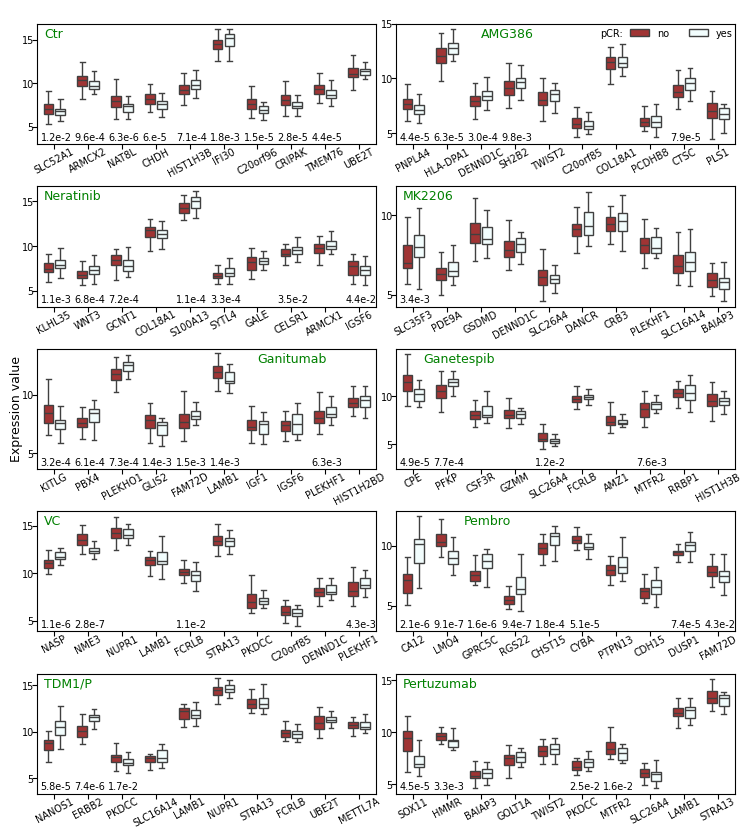

In [88]:
arm = ['Ctr', 'AMG386', 'Neratinib', 'MK2206', 'Ganitumab',  'Ganetespib', 'VC', 'Pembro', 'TDM1/P', 'Pertuzumab']
ntop = 10

fz1 = 9
fz2 = 8
fz3 = 7
fig, axes = plt.subplots(5,2, figsize = (9,10))
for idxa, a in enumerate(arm):
    #get gexp and pCR data of top genes in an arm, construct a df gexpv for ploting box plots
    table2_a = table2[table2['Arm']==a]
    table2_a = table2_a.drop(columns = ['Arm long', 'HR','HER2'])
    gtop = genes.loc[list(range(ntop)),a]
    gexpa = gexp.loc[table2_a.index.values,gtop] # expression values of ntop genes of an arm
    gexpac = pd.concat([gexpa, table2_a], axis=1) # combine gexpa with clinical data in table2_a
    for idxg, g in  enumerate(gexpa.columns.values): # stack expression values of ntop genes vertically, and add
        temp = gexpac[[g, 'pCR']].copy()             # a column for gene names
        temp['gene'] = g
        temp.rename(columns={g:'values'},inplace=True)
        if idxg == 0:
            gexpv = temp
        else:
            gexpv = pd.concat([gexpv, temp], axis =0)
    gexpv.index = list(range(gexpa.shape[0]*ntop))

    #compute the p-value for the two pCR groups of each gene
    p_values = []
    for g in gtop:
        table2_a = table2[table2['Arm']==a]
        temp = table2_a[table2_a['pCR'] == 'yes']
        gexp_g = gexpa[g]
        gexp_g1 = gexp_g.loc[temp.index.values]
        temp = table2_a[table2_a['pCR'] == 'no']
        gexp_g0 = gexp_g.loc[temp.index.values]
        stats, p_val = ranksums(gexp_g1, gexp_g0)
        p_values += [p_val]
    p_values = pd.Series(p_values, index = gtop)
        
    #box plots
    r = idxa // 2 
    c = idxa % 2
    ax = axes[r,c]
    sns.boxplot(x="gene", y='values', hue="pCR", data=gexpv, gap = 0.2,
                width = 0.7, showfliers=False, palette=['firebrick', 'azure'], ax = ax)
    
    #legend
    if a == 'AMG386':
        legend = ax.legend(title="pCR:",loc='upper right', bbox_to_anchor=(1.02, 1.16),
                      ncol=2, fontsize = fz3, frameon=False)
        title = legend.get_title()
        #title.set_color("#ca699d")
        title.set_size(fz3)
        title.set_x(-70)
        title.set_y(-15)
        #title.set_rotation(90)
    else:
        leg = ax.legend()
        leg.remove()      
    
    # x tick/label, ylabel
    ax.tick_params(axis='x', labelrotation=28, labelsize = fz3, pad=-2)
    ax.set_xlabel('')
    ax.tick_params(axis = 'y', labelsize = fz3, pad =-1)
    if r == 2 and c == 0:
        ax.set_ylabel('Expression value', fontsize = fz1, labelpad =-1)
    else: 
        ax.set_ylabel('')
    temp = ['AMG386', 'TDM1/P', 'VC', 'Neratinib', 'Ctr', 'Pertuzumab']
    if a in temp:
        ax.set_yticks([5, 10, 15])
    else:
        ax.set_yticks([5, 10])

    # increase bottom blank space
    bottom, top = ax.get_ylim()
    if a=='AMG386' or a=='MK2206' or a == 'VC' or a == 'Pertuzumab':
        bottom = bottom
    else:
        bottom -= (top - bottom)/10 *1.5 
    ax.set_ylim(bottom, top)    
     
    #display arm name
    if a == 'AMG386':
        h = 0.25
    elif a ==  'Ganetespib':
        h = 0.08
    elif a == 'Pembro':
        h = 0.2
    elif a == 'Ganitumab':
        h = 0.65
    else:
        h = 0.02    
    ax.text(h, 0.97, a, horizontalalignment='left', 
            verticalalignment='top', transform=ax.transAxes,color = 'g', fontsize = fz1)

    #display p-values    
    for i, g in enumerate(p_values.index):
        p_val = p_values[g]
        if  p_val < 0.05:
            p_val_formatted = np.format_float_scientific(p_val, precision =1,  exp_digits=1)
            temp = i*0.1 + 0.01 
            ax.text(temp, 0.1, p_val_formatted, horizontalalignment='left', 
                            verticalalignment='top', transform=ax.transAxes,fontsize = fz3)

    '''
    if a == 'Ctr':
        h = 0.9
        ax.text(h, 0.1, 'p-value', horizontalalignment='left', 
                    verticalalignment='top', transform=ax.transAxes, fontsize = fz3)  
    elif a == 'MK2206':
        h = 0.2
        ax.text(h, 0.1, 'p-value', horizontalalignment='left', 
                    verticalalignment='top', transform=ax.transAxes) 
    elif a == 'VC':
        h = 0.25
        ax.text(h, 0.1, 'p-value', horizontalalignment='left', 
                    verticalalignment='top', transform=ax.transAxes) 
    elif a == 'Pertuzumab':
        h = 0.35
        ax.text(h, 0.1, 'p-value', horizontalalignment='left', 
                    verticalalignment='top', transform=ax.transAxes)
    '''        

fig.subplots_adjust(wspace=0.06, hspace=0.35)
    
plt.savefig(directory_out + 'fig_topgexp_per_arm.png')
plt.show()        


